# Credit card prediction using GradientBoostingClassifier

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/My Online Training/Python/Udamey/Machine Learning A-Z™: Hands-On Python & R In Data Science/Part 3 - Classification/Support Vector Machine/UniversalBank.csv')

In [4]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Unwanted columns drops
dataset1 = dataset.drop(['ID','ZIP Code'],axis=1)

In [6]:
#check null value columns
dataset1.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

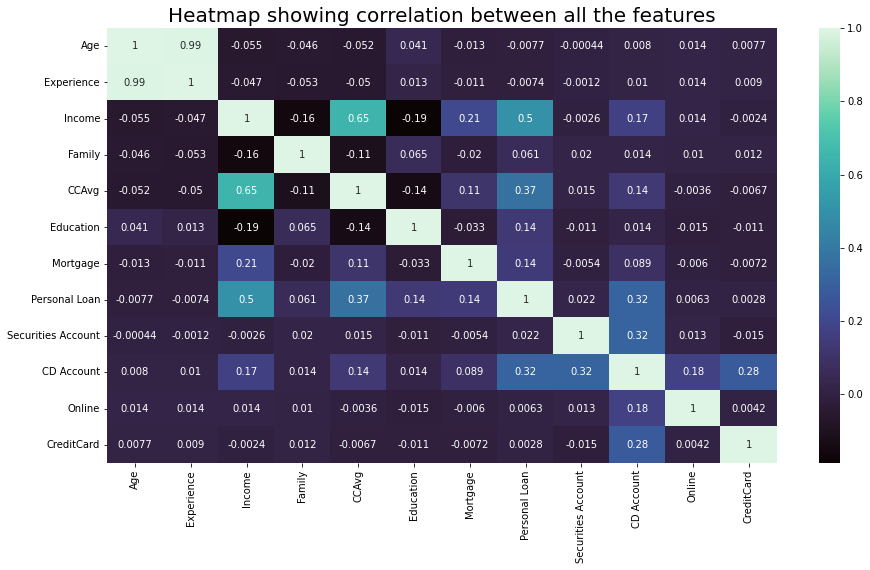

In [7]:
# Correlation checking
plt.figure(figsize=(15,8))
plt.title("Heatmap showing correlation between all the features", fontsize=20)
sns.heatmap(dataset1.corr(),annot = True, cmap='mako')

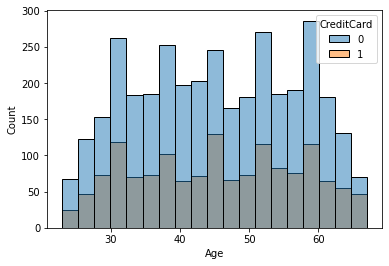

In [8]:
sns.histplot(data=dataset1,x='Age',kde = False,hue='CreditCard')

## Splitting the dataset into the Training set and Test set

In [9]:
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [11]:
print(X_train)

[[ 51.  25. 163. ...   0.   0.   1.]
 [ 42.  17.  44. ...   1.   1.   1.]
 [ 35.  11.  24. ...   0.   0.   0.]
 ...
 [ 26.   1.  24. ...   0.   0.   0.]
 [ 57.  33.  49. ...   1.   1.   1.]
 [ 33.   9.  38. ...   0.   0.   0.]]


## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
print(X_train)

[[ 0.50139355  0.4332751   1.91789253 ... -0.34892253 -0.25797849
   0.82423002]
 [-0.28265095 -0.26260011 -0.65070583 ...  2.86596567  3.87629217
   0.82423002]
 [-0.89246334 -0.78450651 -1.08240303 ... -0.34892253 -0.25797849
  -1.21325355]
 ...
 [-1.67650784 -1.65435051 -1.08240303 ... -0.34892253 -0.25797849
  -1.21325355]
 [ 1.02408989  1.1291503  -0.54278153 ...  2.86596567  3.87629217
   0.82423002]
 [-1.06669545 -0.95847531 -0.78021499 ... -0.34892253 -0.25797849
  -1.21325355]]


In [14]:
print(X_test)

[[ 0.76274172  0.8681971  -1.10398789 ... -0.34892253 -0.25797849
  -1.21325355]
 [-1.06669545 -0.95847531  0.19110372 ... -0.34892253 -0.25797849
   0.82423002]
 [ 0.76274172  0.3462907  -0.04632974 ... -0.34892253 -0.25797849
  -1.21325355]
 ...
 [ 0.50139355  0.4332751  -0.0679146  ... -0.34892253 -0.25797849
  -1.21325355]
 [-0.80534728 -0.87149091  0.08317942 ... -0.34892253 -0.25797849
   0.82423002]
 [-1.32804361 -1.21942851 -0.97447873 ... -0.34892253 -0.25797849
   0.82423002]]


## Training the GradientBoosting classifier model on the Training set

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

## Predicting the Test set results

In [16]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 1]
 ...
 [0 0]
 [0 1]
 [0 0]]


## Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[866  10]
 [317  57]]


0.7384